In [2]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Hypothesis Testing

In Data8.2x, you have been using simulation to conduct hypothesis testing. Now that we have completed Data8.2x, this is a good time to take a step back and reflect on hypothesis testing. 

Every hypothesis test has roughly the same structure. The following 4 steps provide a rough outline:

1) State the null and alternate hypotheses. Generally, the alternate hypothesis is what you are trying to show. Essentially, if you want to show a result, we assume the opposite is true and try to prove ourselves wrong. 

2) Determine/calculate a test statistic. See your book for a formal definition, but generally, the test statistic is any quantity that helps us evaluate our sample with respect to our null hypothesis. 

3) Determine distribution of test statistic and compute a $p$-value. If you have taken inferential statistics before, you likely computed a $z$ or $t$ statistic and used a calculator or table to compute a $p$-value. This is based on asymptotic theory of sample means/proportions. This is not the approach taken in Data8.2x. With better computing power, we can use simulation to obtain an empirical distribution of our test statistic under the null hypothesis. 

4) Conclude. For low $p$-value (generally below 0.05), we reject the null hypothesis. For high $p$-value, we fail to reject. Low $p$-value implies that our sample would be very unusual if the null hypothesis were actually true. Therefore, that is evidence that the null hypothesis is wrong. 

### Example

Let's work through an example. Suppose that in the upcoming election, Referendum A is up for approval in Colorado. You suspect that in El Paso County, more than half of eligible voters support the referendum. You collect a random sample of 200 eligible voters in El Paso County and 115 of them express support. Is there evidence to conclude that supports your suspicion? 

#### Step 1: Hypothesis

State the null and alternative hypotheses.

$$
H_0: P(voter_{supportive}) = 0.5
$$
$$
H_1: P(voter_{supportive}) \gt 0.5
$$

#### Step 2: Test Statistic

Select a test statistic and compute that test statistic for the sample.

*The test statistic we will choose is the difference between the number of supportive responses from the survey data and the number of supportive responses from the expected data under the null hypothesis. Represented mathematically, for a survey of 200 people, $teststat = data_{survey} - 100$.*

#### Step 3: $p$-value

3a) If $H_0$ were true, what should the value of $\hat{p}$ be close to? In other words, if in fact, half of eligible voters support the referendum, what value should your test statistic take? 

$\hat p = 1$

$teststat = 0$, 

*under a perfect scenario if the null hypothesis were to be true. In other words, we expect a high p-value. However, we will only reject the null hypothesis if we have a p-value of less than 0.05.*

3b) In words (and in the context of this problem), describe what the $p$-value is. 

*The p-value is the probability that our survey result (or results that are more favorable for Referandum A) is observable, assuming that the null hypothesis is true.*

3c) Find the $p$-value directly and using simulation. Hint: the binomial distribution will be of use here. 

In [3]:
# First, I will build an array of simulations of my test statistic under the null hypothesis
ts = []
for _ in np.arange(10000):
    rep = stats.binom.rvs(200, 0.5, size=1)
    ts = np.append(ts, rep - 100)

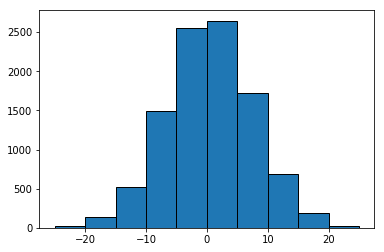

In [4]:
# Next, I will make a histogram of the results of this simulation, which consists of 10,000 repetitions
plt.hist(ts)
plt.show()

*By simply looking at this histogram, I am inclined to say that a test statistic of 15 might be in the 5% most extreme results. But let's take an average and find out.*

In [5]:
np.mean(ts>=15)

0.0211

#### Step 4: Conclude

What is your conclusion? Be sure to state your conclusion in the context of the problem.

*Because I have a p-value of less than 0.05, we can reject the null hypothesis. * 

*In other words, only 2.17% of the results simulated under the null hypothesis (that people are equally likely to vote for Ref A as they are to vote against it) were at least as favorable for Referandum A as were our observed results. Because of such a small likelihood of randomly obtaining these results under neutral circumstances, we can conclude that people are indeed more likely to vote in support of Referandum A than they are to vote against it, based on this poll.*

## Confidence Intervals

Construct and interpret a 95% confidence interval on $p$, the true proportion of eligible El Paso County voters who support the referendum. There are many ways to construct such an interval (bootstrap, the binomial distribution, asymptotically). Select one and implement. 

Also, compare your interval to the results of your hypothesis test. Does your interval contain the value 0.5? Why does that matter? 

In [8]:
reps = stats.binom.rvs(200, 115/200, size = 10000) / 200
left = percentile(2.5, reps)
right = percentile(97.5, reps)
print("Lower bound:", left, "      Upper bound:", right)

Lower bound: 0.505       Upper bound: 0.645


*The interval which I identified does not contain the value 0.5. This matters because it means that the null hypothesis is not included in the 95% confidence interval, meaning it is very unlikely that half of the people are supportive of Referandum A based on our sample.*

# In-Class Example:

Golf balls were collected off a golf course. Are these four types equally likely to be used?  

Observed:  
A - 137  
B - 138  
C - 108  
D - 117  

Should be 125 for each. This is $H_0$.  

The test statistic we are going to use first is $max - min$.

How often do I get 30 (observed value) or greater (more extreme)? This is the p-value.

In [89]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
ts = []
for _ in np.arange(10000):
    rs = stats.multinomial.rvs(500, [0.25, 0.25, 0.25, 0.25], size=1)
    ts = np.append(ts, np.max(rs) - np.min(rs))
    
ts

array([22., 10.,  9., ..., 20., 17., 22.])

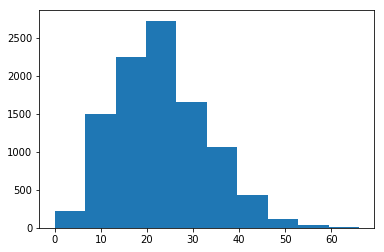

In [91]:
plt.hist(ts)
plt.show()

In [93]:
np.mean(ts>=30)

0.239

So using this test statistic, we **Fail to reject** the null hypothesis.

Let's use a different test statistic, the sum of the absolute values of differences between observed and expected for each type of golf ball.

In [102]:
test_stat_2 = []
for _ in np.arange(10000):
    rs = stats.multinomial.rvs(500, [0.25, 0.25, 0.25, 0.25], size=1)
    test_stat_2 = np.append(test_stat_2, np.sum(abs(rs - 125)) )
    
test_stat_2

array([54., 48.,  6., ..., 46., 36., 14.])

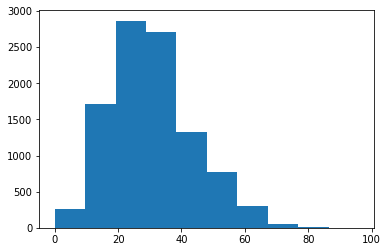

0.0929

In [103]:
plt.hist(test_stat_2)
plt.show()
np.mean(test_stat_2>=50)